### Make sure to document your code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
import statsmodels.api as sm

Q1

In [ ]:
df_coll = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/College.csv')

In [ ]:
df_coll.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


<function matplotlib.pyplot.show(close=None, block=None)>

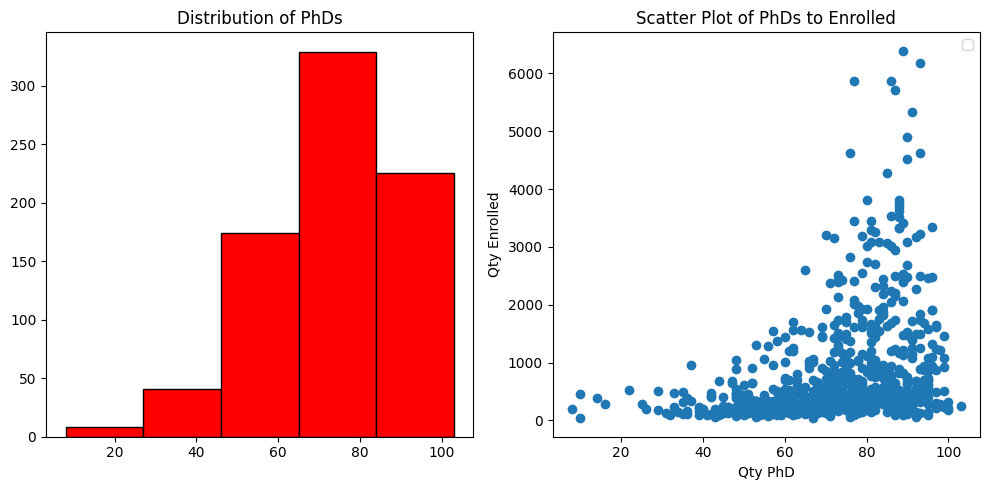

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

X = df_coll['PhD']
y = df_coll['Enroll']

# Plot data on each subplot
axs[0].hist(X, edgecolor='black', color='red', bins=5)
axs[0].set_title('Distribution of PhDs')
axs[1].scatter(X, y,)
axs[1].set_xlabel('Qty PhD')
axs[1].set_ylabel('Qty Enrolled')
axs[1].set_title('Scatter Plot of PhDs to Enrolled')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show
axs[1].legend()

# Show the plot
plt.show

Q3.

In [ ]:
df_coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df_coll.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
# List all columns with dtype 'object'
object_columns = df_coll.select_dtypes(include='object').columns.tolist()

# Print the list of object columns
for i in object_columns:
  print(i)

Unnamed: 0
Private


In [ ]:
df_coll.isna().sum()

,0
Unnamed: 0,0
Private,0
Apps,0
Accept,0
Enroll,0
Top10perc,0
Top25perc,0
F.Undergrad,0
P.Undergrad,0
Outstate,0


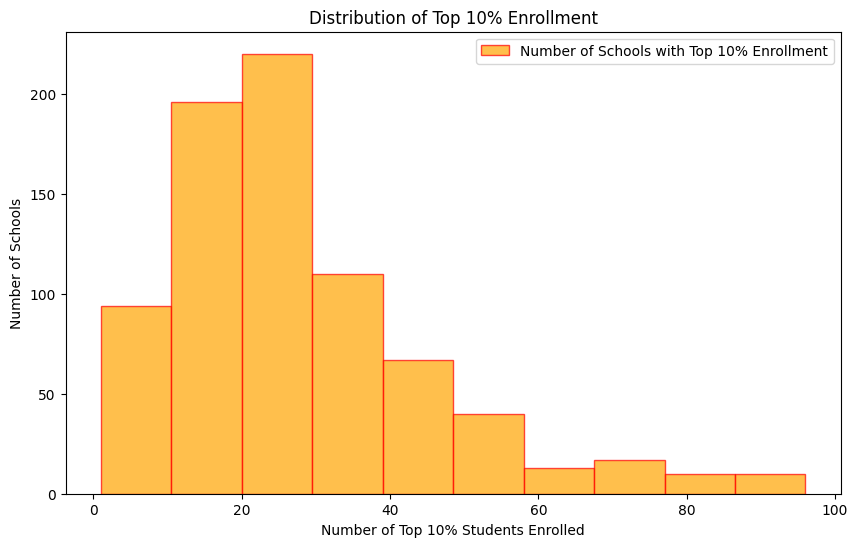

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_coll['Top10perc'], bins=10, color='orange', edgecolor='red', alpha=0.7, label='Number of Schools with Top 10% Enrollment')
plt.xlabel('Number of Top 10% Students Enrolled')
plt.ylabel('Number of Schools')
plt.title('Distribution of Top 10% Enrollment')
plt.legend()
plt.show()


In [ ]:
df_coll['10_log1p'] = np.log1p(df_coll['Top10perc'])

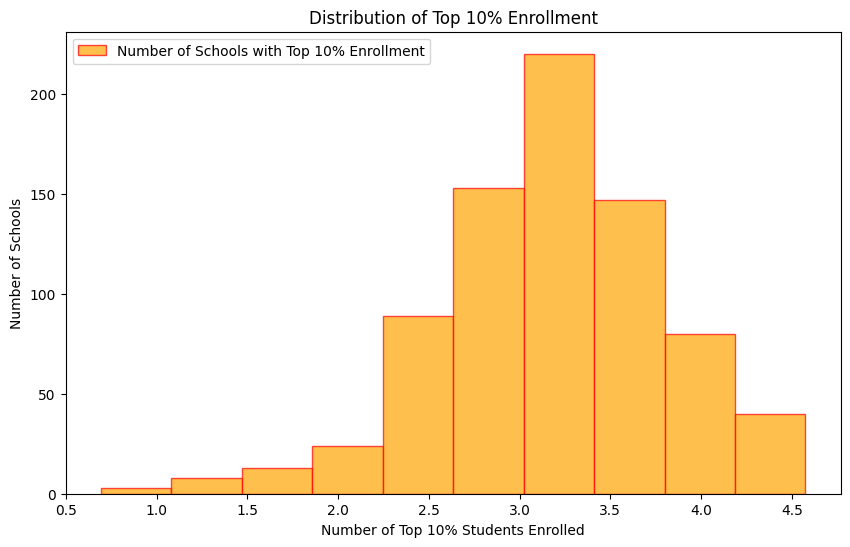

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_coll['10_log1p'], bins=10, color='orange', edgecolor='red', alpha=0.7, label='Number of Schools with Top 10% Enrollment')
plt.xlabel('Number of Top 10% Students Enrolled')
plt.ylabel('Number of Schools')
plt.title('Distribution of Top 10% Enrollment')
plt.legend()
plt.show()

In [ ]:
# Calculate skewness for each column
skewness = df_coll['Top10perc'].skew()

# Calculate kurtosis for each column
kurtosis = df_coll['Top10perc'].kurtosis()

# Calculate skewness for each column
skewness_log = df_coll['10_log1p'].skew()

# Calculate kurtosis for each column
kurtosis_log = df_coll['10_log1p'].kurtosis()

"Good" Skewness: Typically between -0.5 and 0.5, indicating low skew.

"Good" Kurtosis: Close to 0, typically between -1 and 1, indicating a distribution similar to normal.

In [ ]:
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)
print('Skewness log:', skewness_log)
print('Kurtosis log:', kurtosis_log)

Skewness: 1.4132167808936722
Kurtosis: 2.208064686156094
Skewness log: -0.4337382206459161
Kurtosis log: 0.7955029721239639


Q4

In [ ]:
X = df_coll[['Top10perc']]
y = df_coll['Grad.Rate']

In [ ]:
X['intercept'] = 1


<ipython-input-15-5313c4da1194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [ ]:
X.head(5)

,Top10perc,intercept
0,23,1
1,16,1
2,22,1
3,60,1
4,16,1


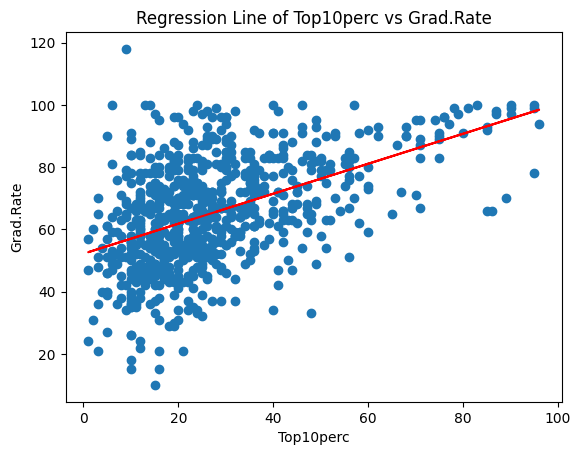

In [ ]:
# prompt: plot with X and y and regression line

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X['Top10perc'], y)
plt.plot(X['Top10perc'], y_pred, color='red')
plt.xlabel('Top10perc')
plt.ylabel('Grad.Rate')
plt.title('Regression Line of Top10perc vs Grad.Rate')
plt.show()


In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = sm.OLS(y_train, X_train).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     73.78
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           9.04e-15
Time:                        16:10:58   Log-Likelihood:                -616.74
No. Observations:                 156   AIC:                             1237.
Df Residuals:                     154   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top10perc      0.4930      0.057      8.590      0.000       0.380       0.606
intercept     52.2678      1.909     27.383      0.000      48.497      56.039
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.948
Skew:                          -0.100   Prob(JB):                        0.623
Kurtosis:                       3.326   Cond. No.                         62.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)


# Calculate residuals
residuals = y_train - y_train_pred

# Calculate RMSE
rmse_train = np.sqrt(np.mean(residuals**2))

# Calculate residuals
residuals = y_test - y_pred

# Calculate RMSE
rmse_test = np.sqrt(np.mean(residuals**2))

print("Training RMSE: " + str(rmse_train))
print("Testing RMSE: " + str(rmse_test))

Training RMSE: 12.610110635367935
Testing RMSE: 15.44904326807296


Q7.

In [ ]:
X = df_coll.drop(['Grad.Rate', 'Unnamed: 0', '10_log1p'], axis = 1)
y = df_coll['Grad.Rate']

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X['private_encoded'] = label_encoder.fit_transform(X['Private'])

In [ ]:
X = X.drop(['Private'], axis = 1)

In [ ]:
X['intercept'] = 1

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model2 = sm.OLS(y_train, X_train).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     12.79
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.18e-24
Time:                        01:52:26   Log-Likelihood:                -911.58
No. Observations:                 234   AIC:                             1859.
Df Residuals:                     216   BIC:                             1921.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Apps                0.0010      0.001      1.386      0.167      -0.000       0.002
Accept              0.0008      0.001      0.557      0.578      -0.002       0.004
Enroll              0.0029      0.005      0.630      0.529      -0.006       0.012
Top10perc           0.0061      0.144      0.043      0.966      -0.278       0.290
Top25perc           0.1706      0.109      1.569      0.118      -0.044       0.385
F.Undergrad        -0.0011      0.001     -1.376      0.170      -0.003       0.000
P.Undergrad        -0.0011      0.001     -2.115      0.036      -0.002   -7.67e-05
Outstate            0.0016      0.000      3.589      0.000       0.001       0.003
Room.Board          0.0015      0.001      1.379      0.169      -0.001       0.004
Books              -0.0017      0.005     -0.347      0.729      -0.012       0.008
Personal           -0.0012      0.001     -0.896      0.371      -0.004       0.001
PhD                 0.0018      0.097      0.019      0.985      -0.188       0.192
Terminal           -0.0299      0.113     -0.264      0.792      -0.253       0.194
S.F.Ratio           0.3237      0.321      1.010      0.314      -0.308       0.955
perc.alumni         0.1529      0.086      1.780      0.076      -0.016       0.322
Expend             -0.0002      0.000     -0.664      0.507      -0.001       0.000
private_encoded     0.6377      2.980      0.214      0.831      -5.236       6.512
intercept          29.2332      8.961      3.262      0.001      11.570      46.896
==============================================================================
Omnibus:                        3.654   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.732
Skew:                          -0.158   Prob(JB):                        0.155
Kurtosis:                       3.532   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_train_pred = model2.predict(X_train)

# Calculate residuals
residuals_train = y_train - y_train_pred

# Calculate RMSE
rmse_train = np.sqrt(np.mean(residuals_train**2))

# Calculate residuals
residuals_test = y_test - y_pred

# Calculate RMSE
rmse_test = np.sqrt(np.mean(residuals_test**2))

print("Training RMSE: " + str(rmse_train))
print("Testing RMSE: " + str(rmse_test))

Training RMSE: 11.902049877964878
Testing RMSE: 15.133526746390658
